<a href="https://colab.research.google.com/github/PANKAJ-GUPTA-201998/CPU-AND-memory-/blob/main/cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [77]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [78]:
# Import data from and in DataFram
do = pd.read_csv('/content/ACTUAL_DATASET.csv')
data =do.iloc[:1440]
del data['MEMORY']
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,307
1,223
2,134
3,116
4,134


In [79]:
data.isna().sum()

Request    0
dtype: int64

In [80]:
data.describe()

,Request
count,1440.000000
mean,122.578472
std,38.294669
min,97.000000
25%,113.000000
50%,115.000000
75%,122.000000
max,1046.000000


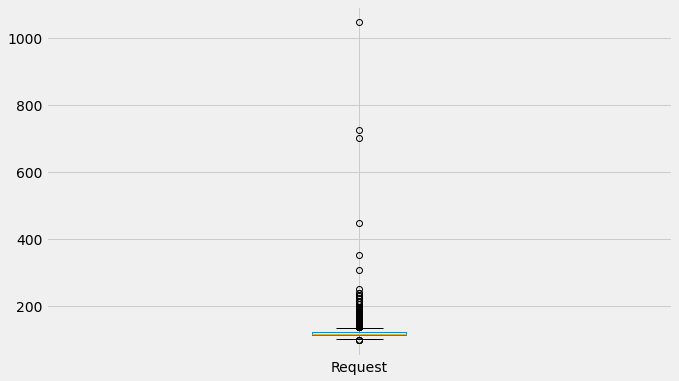

In [81]:
data.boxplot()
plt.show()

In [82]:
import numpy as np
for x in ['Request']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [83]:
data.isnull().sum()

Request    119
dtype: int64

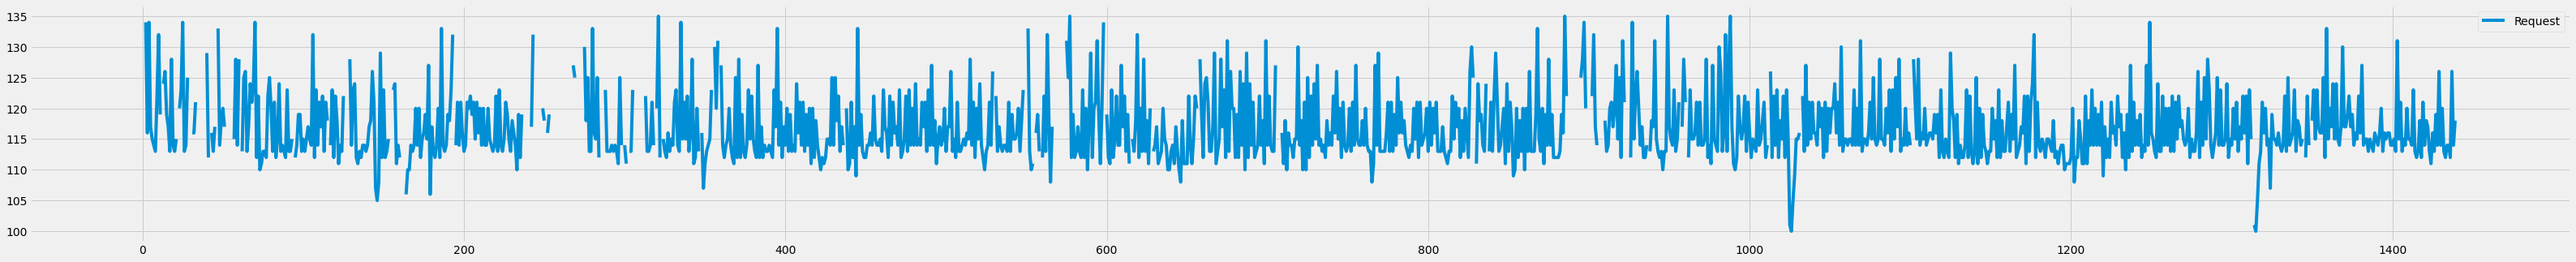

In [84]:
data.plot(figsize=(50,5))

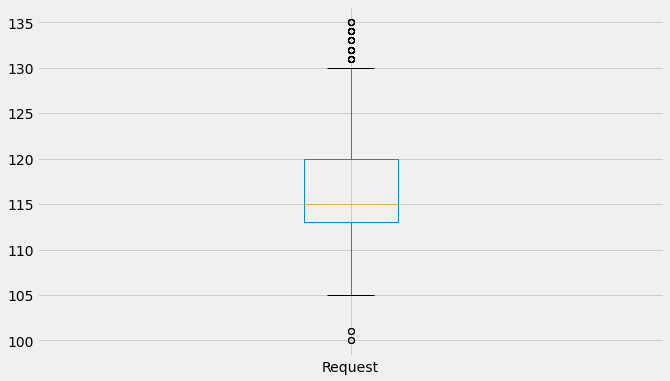

In [85]:
data.boxplot()

In [86]:
data.mean()

Request    116.934898
dtype: float64

In [87]:
from sklearn.impute import KNNImputer
from fancyimpute import KNN
missing_col = ['Request']
for i in missing_col:
 data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [88]:
#ADF to chek the series Stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.432880
No of Lags: 24.000000
No of Observations: 1415.000000
Critical Values @ 0.05: -2.86
p-value: 0.000000


<Figure size 720x432 with 0 Axes>

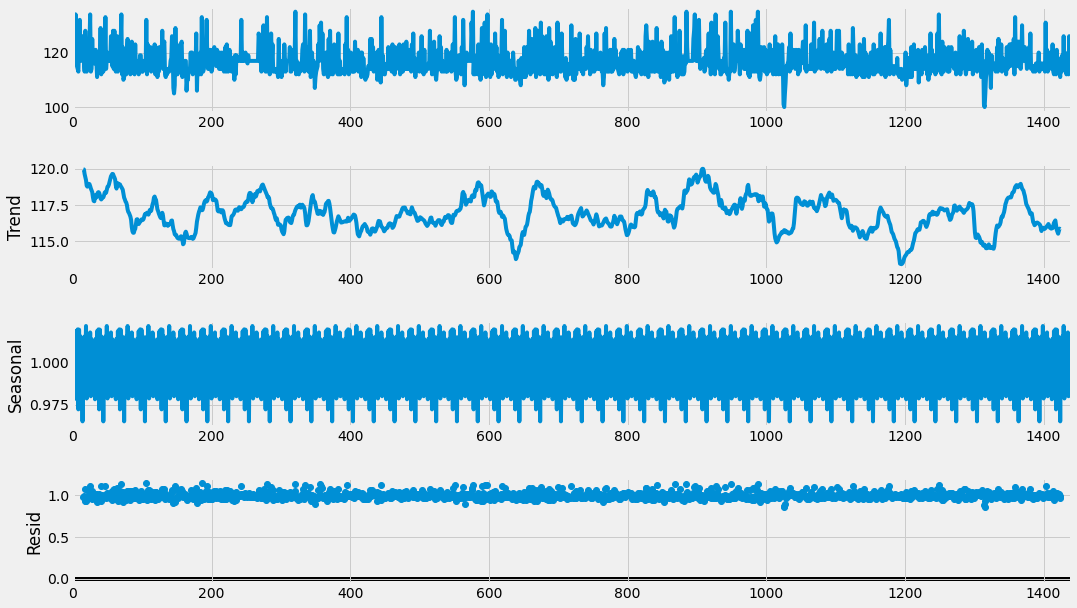

In [89]:
result = seasonal_decompose(data, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


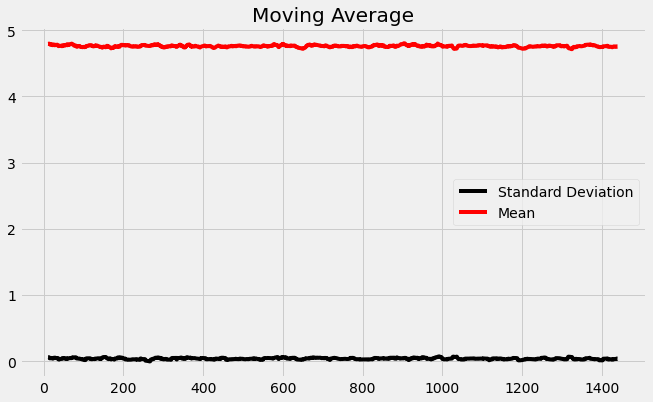

In [90]:
# Convert data on Log to reduce the magnitude of the values and reduce the rising trend in the series 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

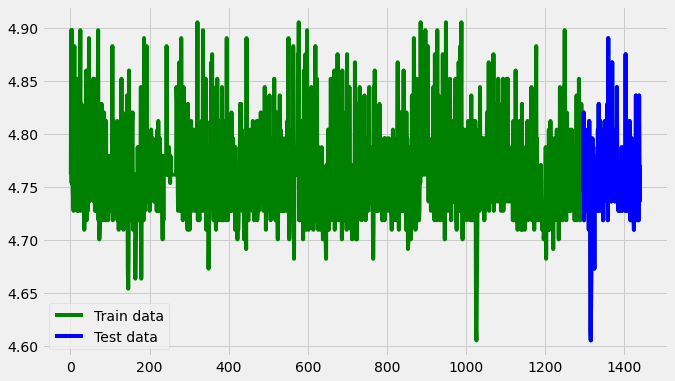

In [91]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [64]:
# Check the corrct values and model
model_autoARIMA1 = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7706.847, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6012.380, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4340.014, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4312.149, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4384.307, Time=1.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4365.514, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4579.188, Time=1.99 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-4555.700, Time=1.97 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4570.428, Time=5.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-4396.077, Time=3.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4270.896, Time=1.55 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-4426.118, Time=4.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4564.076, Time=9.73 sec

Best model:  ARIMA(2,0,2)(0

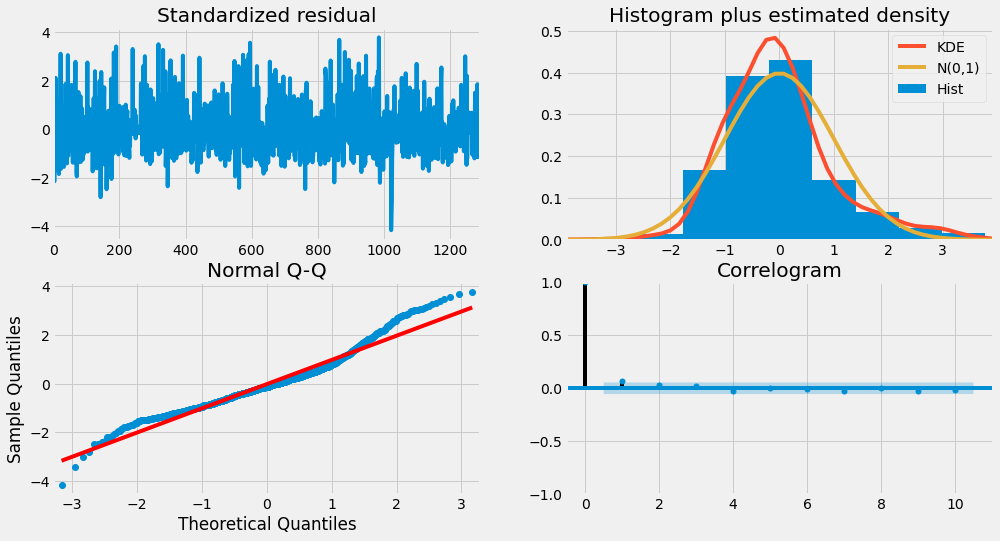

In [65]:
# Residual Data plot
model_autoARIMA1.plot_diagnostics(figsize=(15,8))
plt.show()

In [66]:
import statsmodels.api as sm

In [67]:
# Fit the data on ARMA modeal with parameter (3,3)
model = sm.tsa.arima.ARIMA(train_data, order=(2, 0, 2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1293
Model:                 ARIMA(2, 0, 2)   Log Likelihood                2308.009
Date:                Fri, 22 Apr 2022   AIC                          -4604.019
Time:                        09:59:59   BIC                          -4573.031
Sample:                             0   HQIC                         -4592.389
                               - 1293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7611      0.002   2216.079      0.000       4.757       4.765
ar.L1         -0.0518      0.037     -1.391      0.164      -0.125       0.021
ar.L2          0.9449      0.037     25.400      0.0

In [68]:
# ljungbox test
import statsmodels.api as sm
sm.stats.acorr_ljungbox(fitted.resid, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,26.705549,0.143753


1296    4.742201
1297    4.781391
1298    4.742193
1299    4.781255
1300    4.742193
          ...   
1565    4.773616
1566    4.748651
1567    4.773574
1568    4.748693
1569    4.773533
Name: predicted_mean, Length: 274, dtype: float64


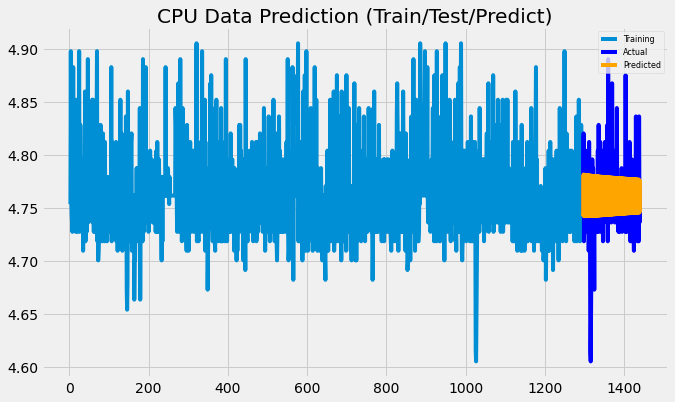

In [69]:
fc = fitted.forecast(274, alpha=0.05) 
print(fc) # 95% confidence
fc_series = pd.Series(fc, index=test_data.index, name="Request")
plt.plot(train_data, label='Training')
plt.plot(test_data, color = 'blue', label='Actual')
plt.plot(fc_series, color = 'orange',label='Predicted')
plt.title('CPU Data Prediction (Train/Test/Predict)')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [70]:
# report performance after train and test
p = fc_series.to_frame()
fc = fc[:144]
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_data['Request']- p['Request']/np.abs(test_data['Request'])))
print('MAPE: '+str(mape))
mpe = np.mean((test_data['Request']- p['Request']/np.abs(test_data['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data['Request']- p['Request'])
print('ME: '+str(me))

MSE: 0.0012639065234746909
MAE: 0.024783875322288762
RMSE: 0.035551463028610945
MAPE: 3.7551264622544007
MPE: -95.35397890970049
ME: -0.004971933737055598


In [71]:
# Now final pridict for 7 another days and now used all data set to train the model
model_pr = sm.tsa.arima.ARIMA(df_log, order=(3,0,2))  
fitted_pr = model_pr.fit()  
print(fitted_pr.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1440
Model:                 ARIMA(3, 0, 2)   Log Likelihood                2588.448
Date:                Fri, 22 Apr 2022   AIC                          -5162.897
Time:                        10:00:03   BIC                          -5125.990
Sample:                             0   HQIC                         -5149.120
                               - 1440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7606      0.002   2304.533      0.000       4.757       4.765
ar.L1          0.0279      0.056      0.497      0.619      -0.082       0.138
ar.L2          0.9574      0.035     27.245      0.0

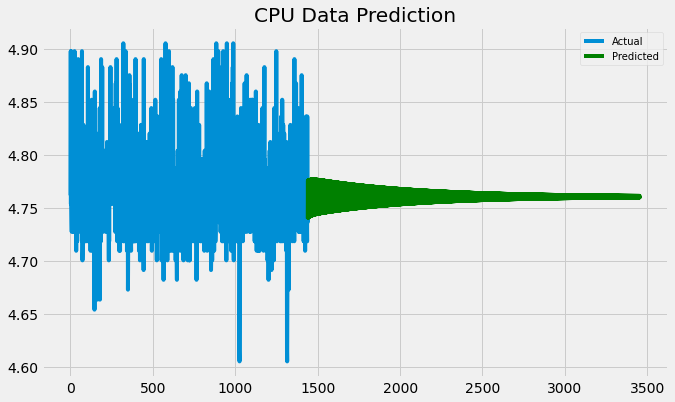

In [72]:
# Forecast for 7 another days so 1440 records required
x = pd.Series(range(test_data.index.max()+1,4752))
fc_pr = fitted_pr.forecast(2016, alpha=0.05)  # 95% confidence
fc_series_pr = pd.Series(fc_pr, index = x, name="Request")
plt.plot(df_log, label='Actual')
plt.plot(fc_series_pr, color = 'green',label='Predicted')
plt.title('CPU Data Prediction')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [73]:
# Creating final pridict data set and recover the original series
pridict_data_CPU = np.round((np.exp(fc_series_pr)),0)
pridict_data_CPU.head()

1440    114.0
1441    119.0
1442    115.0
1443    119.0
1444    115.0
Name: Request, dtype: float64

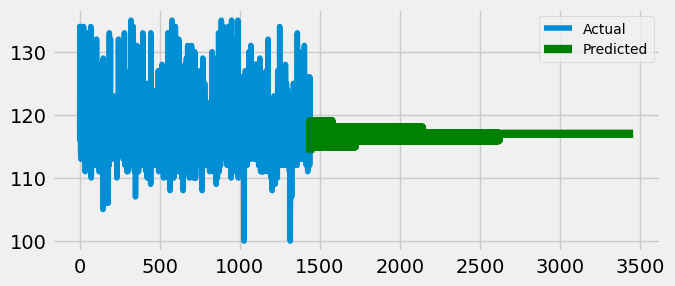

In [94]:
# Plot the actualy (Recovered) series with actual
plt.figure(figsize=(7,3), dpi=100)
plt.plot(data, label='Actual')
plt.plot(pridict_data_CPU, color = 'green',label='Predicted',linewidth=6)
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [75]:
# Export data in 'pridict_data_CPU.csv' 
pridict_data_CPU.to_csv(r'pridict_data_CPU.csv', index = False)